# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Problem and strategy  : 

* Exploring the Starbuck’s Dataset how people make purchasing decisions and how those decisions are influenced by promotional offers.
* There are three types of offers that can be sent: buy-one-get-one (BOGO), discount, and informational.

* I’m going to analyze Starbuck’s Dataset for example: General overview of Starbucks customers including there ages , income and genders. 

* Bulid model to Predict if a customer would view then complete an offer or no. 


In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline



In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Understanding and Cleaning   : 

# 1. Portfolio Data

In [3]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [4]:
portfolio.shape

(10, 6)

In [5]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [6]:
# checking offer_type column how many offers we have 

portfolio.offer_type.value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

#   Portfolio Data Cleaning:

* Rename the column name from 'ID' to 'offer_id'. 

* Seperate values from channels column into different columns.


In [7]:
portfolio = portfolio.copy() 

dummy = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)
portfolio = pd.concat([portfolio, dummy], axis=1)
portfolio = portfolio.drop(columns='channels')
portfolio = portfolio.rename(columns={'id':'offer_id'})

In [8]:
portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


# 2. Profile Data 

In [9]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [10]:
profile.shape

(17000, 5)

In [11]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


#  Profile Data Cleaning:
* change the column name from 'id' to 'person' 

*  change the column name from 'became_member_on' to 'year'

* sort the date into proper format.


In [12]:

# update year
profile["became_member_on"] = pd.to_datetime(profile.became_member_on, format = '%Y%m%d').apply(lambda x:x.year)

# fill null values
profile.gender.fillna('NA' , inplace=True)
profile.income.fillna(profile.income.mean() , inplace=True)

# rename columns
profile.rename(columns={'id': 'person'}, inplace=True)
profile.rename(columns={'became_member_on': 'year'}, inplace=True)



In [13]:
profile.head()

,age,year,gender,person,income
0,118,2017,NA,68be06ca386d4c31939f3a4f0e3dd783,65404.991568
1,55,2017,F,0610b486422d4921ae7d2bf64640c50b,112000.000000
2,118,2018,NA,38fe809add3b4fcf9315a9694bb96ff5,65404.991568
3,75,2017,F,78afa995795e4d85b5d9ceeca43f5fef,100000.000000
4,118,2017,NA,a03223e636434f42ac4c3df47e8bac43,65404.991568


# 3. Transcript Data

In [14]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [15]:
transcript.shape

(306534, 4)

In [16]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [17]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


# Transcript Data cleaning : 



In [18]:
# extract information from the value field
transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis=1)

# fix duplicated names of offer id
transcript['temp'] = np.where(transcript['offer id'].isnull() & transcript['offer_id'].notnull(), transcript['offer_id'],transcript['offer id'])
transcript.drop(['value','offer id', 'offer_id'], axis=1, inplace=True)
transcript.rename(columns={'temp': 'offer_id'}, inplace=True)
transcript.rename(columns={'reward': 'gained_reward'}, inplace=True)

# fill null values
transcript.amount.fillna(0, inplace=True)
transcript.gained_reward.fillna(0, inplace=True)

In [19]:
transcript.head()

,event,person,time,amount,gained_reward,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0


# Data Exploration and Data Visualization :

* Overview of Starbucks customers that include : 

1. Distribution of genders in profile
2. Distribution of ages in profile
3. Distribution of customer count per year in which the customer became member.
4. Distribution income of customer




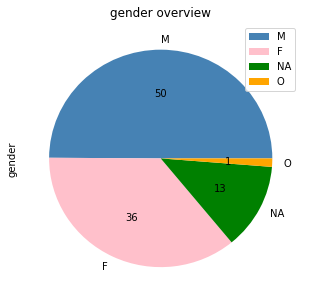

In [20]:
# Customer gender 
profile.gender.value_counts().plot(kind='pie', figsize=(5,5), autopct= '%0.0f' , colors = ['steelblue', 'pink', 'green' , 'orange'], title="gender overview")
plt.legend()


### Commnet : 
* we notice that males are half the customers with 50%. 36% are females. 

In [21]:
# update age
profile['age'] = pd.cut(profile.age, bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 117, 200], 
                               labels=['children', 'YA', '20s', '30s', '40s', '50s', '60s', '70s','80+','NA'])

Text(0,0.5,'Count')

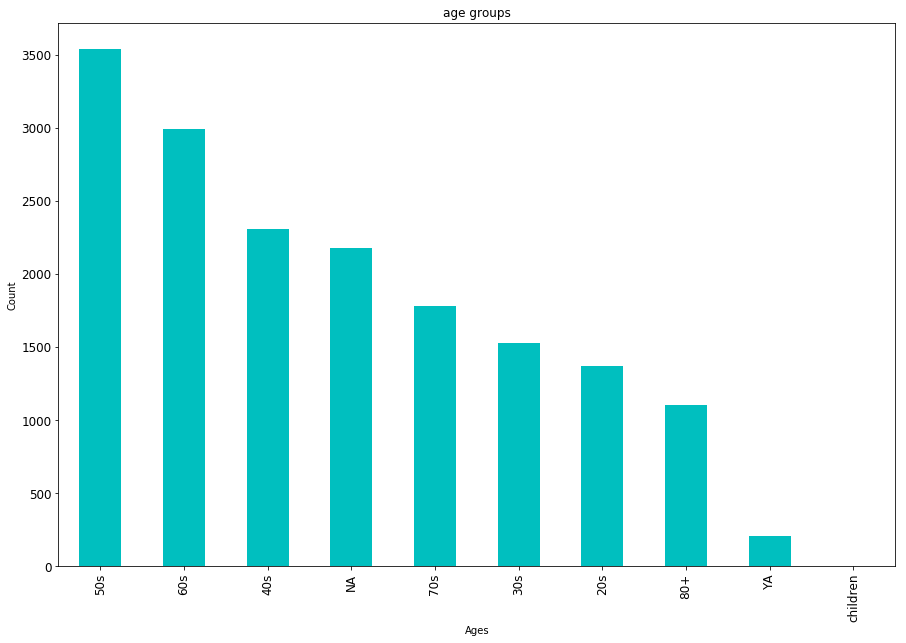

In [22]:
profile.age.value_counts().plot(kind='bar',figsize=(15,10), fontsize=12,color='c', title='age groups')
plt.xlabel('Ages')
plt.ylabel('Count')


### Commnet : 
* we notice that  the highest number of customers are between 50s-60s

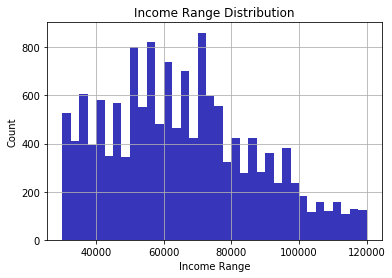

In [23]:
profile[profile.age != 'NA'].income.hist(bins='auto', color='#0504aa',
                            alpha=0.80, rwidth=1);
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Distribution');

### Commnet : 

* Average income user is middle income group ie. 65000-70000

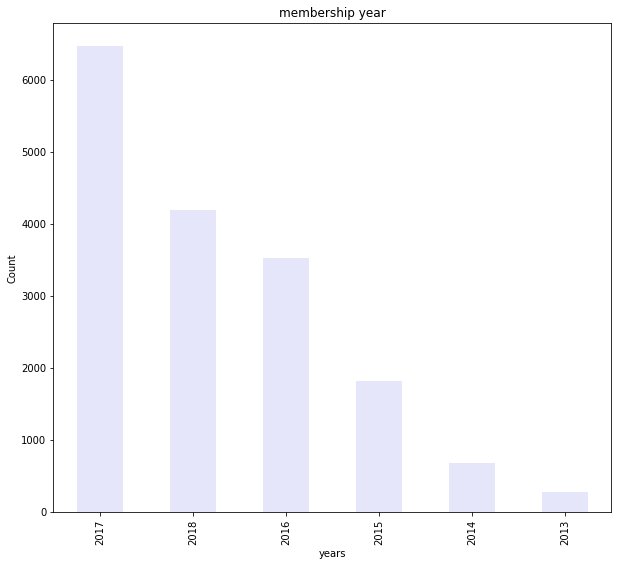

In [24]:
profile.year.value_counts().plot(kind='bar', figsize=(10,9) , color = 'lavender')
plt.xlabel('years')
plt.ylabel('Count')
plt.title('membership year');

### Comment:

* The highest number of membership was in 2017

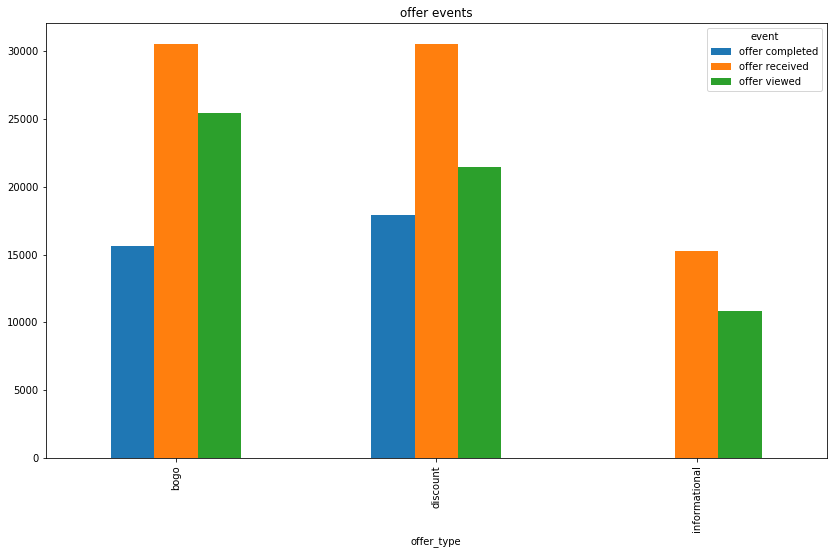

In [25]:
transcript_portfolio = pd.merge(transcript, portfolio, how='left', on='offer_id')
pd.crosstab(transcript_portfolio.offer_type,transcript_portfolio.event).plot(kind='bar', figsize=(14, 8), title='offer events')

### Comment: 

* People are more likely to view BOGO offers , discount offers has a slightly more complete offer and customers who receive the informational offers would view them.

# Building model 

## 1. prepare dataset

In [26]:
transcript_profiles = pd.merge(transcript,profile,how='left',on='person')
all_merge = pd.merge(transcript_profiles,portfolio,on='offer_id')

df = all_merge.copy()

dummies = pd.get_dummies(df['offer_type'])
df = pd.concat([df, dummies], axis=1)


dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['event'])
df = pd.concat([df, dummies], axis=1)


dummies = pd.get_dummies(df['age'])
df = pd.concat([df, dummies], axis=1)

df.head()

,event,person,time,amount,gained_reward,offer_id,age,year,gender,income,...,children,YA,20s,30s,40s,50s,60s,70s,80+,NA
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,70s,2017,F,100000.0,...,0,0,0,0,0,0,0,1,0,0
1,offer received,ebe7ef46ea6f4963a7dd49f501b26779,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,50s,2015,M,41000.0,...,0,0,0,0,0,1,0,0,0,0
2,offer received,f082d80f0aac47a99173ba8ef8fc1909,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,40s,2016,M,33000.0,...,0,0,0,0,1,0,0,0,0,0
3,offer received,c0d210398dee4a0895b24444a5fcd1d2,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,40s,2018,M,33000.0,...,0,0,0,0,1,0,0,0,0,0
4,offer received,57dd18ec5ddc46828afb81ec5977bef2,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,50s,2017,F,80000.0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# get offer viewed rows 
df_view = df[df['offer viewed']==1]
df_view.drop(['offer completed'], axis = 1, inplace=True)

df_view.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,event,person,time,amount,gained_reward,offer_id,age,year,gender,income,...,children,YA,20s,30s,40s,50s,60s,70s,80+,NA
1245,offer viewed,c099206f76b1414db7552f163520053c,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NA,2015,NA,65404.991568,...,0,0,0,0,0,0,0,0,0,1
1246,offer viewed,4293153650e04742b310ac06cd3810e9,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,50s,2018,F,51000.000000,...,0,0,0,0,0,1,0,0,0,0
1247,offer viewed,629fc02d56414d91bca360decdfa9288,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,50s,2018,M,72000.000000,...,0,0,0,0,0,1,0,0,0,0
1249,offer viewed,6e43570e4517416cb3bcadd49d3da70f,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,60s,2018,M,89000.000000,...,0,0,0,0,0,0,1,0,0,0
1250,offer viewed,be7ff3cb6bf84ce395471e52b64b70c6,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,60s,2018,F,66000.000000,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df_complete = df[df['offer completed']==1][['offer_id','person', 'offer completed']]
df_complete.head()

,offer_id,person,offer completed
1248,9b98b8c7a33c4b65b9aebfe6a799e6d9,629fc02d56414d91bca360decdfa9288,1
1254,9b98b8c7a33c4b65b9aebfe6a799e6d9,b860d355ef6e4c66b5d5a837c56ef32d,1
1255,9b98b8c7a33c4b65b9aebfe6a799e6d9,99297ea01107436fa8c2e2bc86f55d89,1
1263,9b98b8c7a33c4b65b9aebfe6a799e6d9,16dc4306258b4fef90ffe99f53ed7952,1
1267,9b98b8c7a33c4b65b9aebfe6a799e6d9,0454292436bd4cee98e8ec873e30433e,1


In [29]:
final_df = df_view.merge(df_complete,right_on=['offer_id','person'],left_on=['offer_id','person'],how='left')
#drop un-needed columns
final_df.drop(['offer_type','gender','year','event','gained_reward','person','offer_id',
               'time','offer received', 'offer viewed','age'], axis = 1, inplace=True)
final_df.fillna(0, inplace=True)

final_df.head()

,amount,income,difficulty,duration,reward,email,mobile,social,web,bogo,...,YA,20s,30s,40s,50s,60s,70s,80+,NA,offer completed
0,0.0,65404.991568,5,7,5,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0.0
1,0.0,51000.000000,5,7,5,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1.0
2,0.0,72000.000000,5,7,5,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1.0
3,0.0,89000.000000,5,7,5,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0.0
4,0.0,66000.000000,5,7,5,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0.0


## 2. create the model:

In [30]:
def create_model(classifer, df):    
    """
    a function that will create a model: train -> predict -> score -> print result
              
    """
    
    print('Training with ' + str(classifer))
    
    features = df.drop(['offer completed'], axis = 1)
    target = df['offer completed']
    
    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

    # fit classifier
    clf = classifer.fit(X_train, y_train)

    # predict on training and test data
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # accuracy on training and test data
    score_train = accuracy_score( y_train , predict_train )
    score_test = accuracy_score( y_test , predict_test )

    # display classifier clf_result dict 
    print('Training Accuracy:' , score_train)
    print('Testing Accuracy :', score_test)
    
    

In [31]:
create_model(AdaBoostClassifier(), final_df)
create_model(GaussianNB(), final_df)
create_model(DecisionTreeClassifier(), final_df)
create_model(RandomForestClassifier(), final_df)

Training with AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Training Accuracy: 0.809584214235
Testing Accuracy : 0.807924619473
Training with GaussianNB(priors=None)
Training Accuracy: 0.775113258834
Testing Accuracy : 0.773918820971
Training with DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Training Accuracy: 0.850719822813
Testing Accuracy : 0.783341386808
Training with RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1

##  Model improvment with GridSearchCV : 
* I ran the classifier with its default parameter so decided to go with AdaBoost also decided to used a very close values to the default parameters 

In [32]:
params = {
    'n_estimators': [40, 45, 50, 55, 60],
    'learning_rate' : [0.8,0.9,1,1.1,1.2],
    'algorithm':['SAMME', 'SAMME.R']
 }

#     'n_estimators': [50, 100,150,200],
#     'learning_rate' : [0.01,0.05,0.1,0.3,1],
#     'algorithm':['SAMME', 'SAMME.R']

df = final_df.copy()
features = df.drop(['offer completed'], axis = 1)
target = df['offer completed']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)
    
cv = GridSearchCV(AdaBoostClassifier(), param_grid=params, n_jobs = -1, scoring='accuracy')


In [33]:
create_model(AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.9, n_estimators=45), final_df)


Training with AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=45, random_state=None)
Training Accuracy: 0.810147991543
Testing Accuracy : 0.809072239671


## Result : 

* Based on these scores AdaBoostClassifier is the best fit to accomplish our goal as it has a stable training and testing scores compared to other models.
* Using grid search, I found that we got 0.11% improvement in accuracy.


# Conclusion : 

* modeling part of project, I used multiple algorithms which are AdaBoostClassifier, GaussianNB, DecisionTreeClassifier and RandomForestClassifier.

* found that Adaboost was the best for our case here. 

* A model is available to predict users behavior Starbucks offers with accuracy of 80%

## Improvements: 

* Building a Machine Learning Pipeline to classify data and create a web/mobile application based on the model.